# Breast cancer diagnosis from histopathological images using (CNN) and deep learning

***Objective***: Use deep learning to detect cancerous cells from histopathological images.

***Outcome:*** A deep learning model that accurately detects and highlights cancerous
Regions.


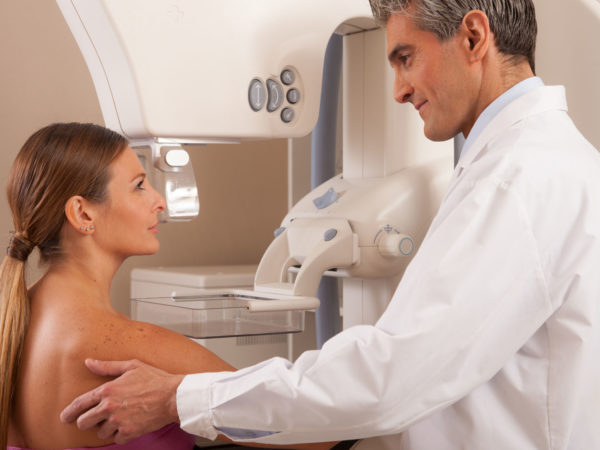


# Breast Cancer
Breast cancer is when breast cells mutate and become cancerous cells that multiply and form tumors. Breast cancer typically affects women and people assigned female at birth (AFAB) age 50 and older, but it can also affect men and people assigned male at birth (AMAB), as well as younger women. Healthcare providers may treat breast cancer with surgery to remove tumors or treatment to kill cancerous cells.


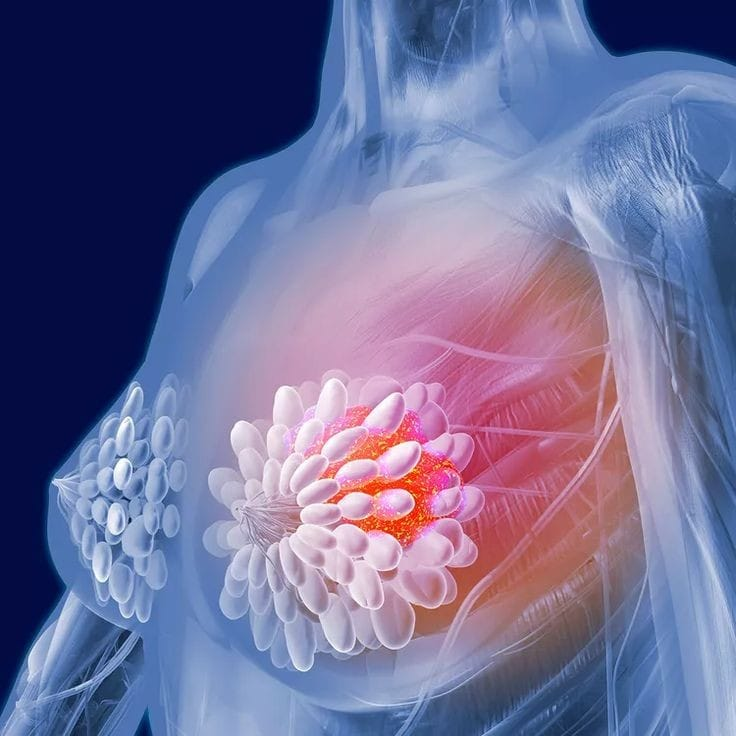

# What is breast cancer?
Breast cancer is one of the most common cancers that affects women and people assigned female at birth (AFAB). It happens when cancerous cells in your breasts multiply and become tumors. About 80% of breast cancer cases are invasive, meaning a tumor may spread from your breast to other areas of your body.

Breast cancer typically affects women age 50 and older, but it can also affect women and people AFAB who are younger than 50. Men and people assigned male at birth (AMAB) may also develop breast cancer.

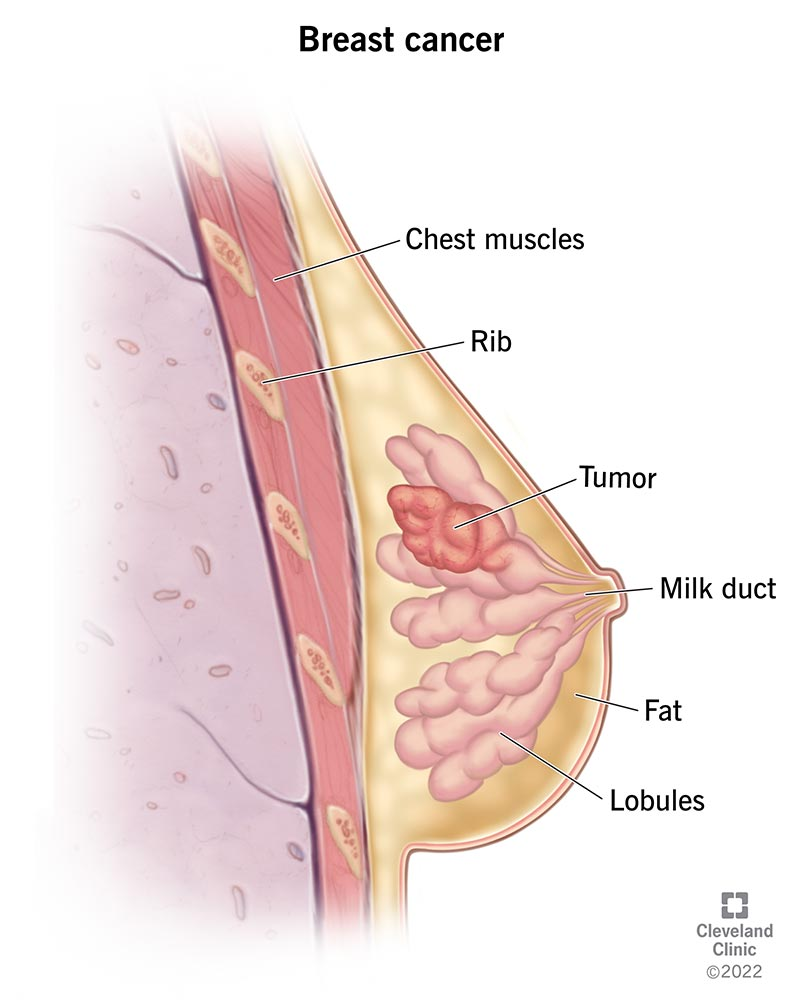

# Breast cancer types
Healthcare providers determine cancer types and subtypes so they can tailor treatment to be as effective as possible with the fewest possible side effects. Common types of breast cancer include:

**Invasive (infiltrating) ductal carcinoma (IDC)**:
This cancer starts in your milk ducts and spreads to nearby breast tissue. It’s the most common type of breast cancer in the United States.
Lobular breast cancer: This breast cancer starts in the milk-producing glands (lobules) in your breast and often spreads to nearby breast tissue. It’s the second most common breast cancer in the United States.
**Ductal carcinoma in situ (DCIS):**
Like IDC, this breast cancer starts in your milk ducts. The difference is DCIS doesn’t spread beyond your milk ducts.
Less common breast cancer types include:

**Triple-negative breast cancer (TNBC)**:
 This invasive cancer is aggressive and spreads more quickly than other breast cancers.
**Inflammatory breast cancer (IBC)**:
This rare, fast-growing cancer looks like a rash on your breast. IBC is rare in the United States.
**Paget’s disease of the breast**:
 This rare cancer affects the skin of your nipple and may look like a rash. Less than 4% of all breast cancers are Paget’s disease of the breast.

In [ ]:
!pip install kaggle
!pip install tensorflow numpy matplotlib opencv-python


In [ ]:
from google.colab import files
files.upload()


Saving kaggle (1).json to kaggle (1) (4).json


{'kaggle (1) (4).json': b'{"username":"asadullah25","key":"70c0c3e2ab9ec65e515083c6a9a5266c"}'}

In [ ]:
!mv "kaggle (1) (4).json" /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json


mv: cannot stat 'kaggle (1) (4).json': No such file or directory


# Call data fron Kaggle

In [ ]:
!kaggle datasets download -d paultimothymooney/breast-histopathology-images --force


Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/breast-histopathology-images
License(s): CC0-1.0
100% 3.09G/3.10G [00:39<00:00, 140MB/s]
100% 3.10G/3.10G [00:39<00:00, 83.9MB/s]


# Extract the Dataset

In [ ]:
import zipfile

# Unzip the dataset
with zipfile.ZipFile('/content/breast-histopathology-images.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

print("Dataset extracted successfully!")


Dataset extracted successfully!


# Set SHORT Dataset

In [ ]:
import os
import shutil
import random

# Define paths
base_dir = '/content/dataset'
output_dir = '/content/selected_images'

# Create directories for selected images
os.makedirs(os.path.join(output_dir, 'cancerous'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'non_cancerous'), exist_ok=True)

# Function to copy a certain number of files from source to destination
def copy_images(src_dir, dest_dir, num_images):
    images = os.listdir(src_dir)
    selected_images = random.sample(images, num_images)  # Select 'num_images' randomly
    for img in selected_images:
        src_img_path = os.path.join(src_dir, img)
        dest_img_path = os.path.join(dest_dir, img)
        shutil.copy(src_img_path, dest_img_path)

# Copy 50 cancerous and 50 non-cancerous images
cancerous_dir = os.path.join(base_dir, '9227', '1')
non_cancerous_dir = os.path.join(base_dir, '9227', '0')

copy_images(cancerous_dir, os.path.join(output_dir, 'cancerous'), 50)
copy_images(non_cancerous_dir, os.path.join(output_dir, 'non_cancerous'), 50)

print("50 cancerous and 50 non-cancerous images have been selected and copied.")


50 cancerous and 50 non-cancerous images have been selected and copied.


# Chacked the balanced Data

In [ ]:
# Check the number of images in each selected category
cancerous_selected_dir = os.path.join(output_dir, 'cancerous')
non_cancerous_selected_dir = os.path.join(output_dir, 'non_cancerous')

num_cancerous = len(os.listdir(cancerous_selected_dir))
num_non_cancerous = len(os.listdir(non_cancerous_selected_dir))

print(f"Number of cancerous images: {num_cancerous}")
print(f"Number of non-cancerous images: {num_non_cancerous}")

# Check if the dataset is balanced
if num_cancerous == num_non_cancerous:
    print("The dataset is balanced.")
else:
    print("The dataset is not balanced.")


Number of cancerous images: 50
Number of non-cancerous images: 50
The dataset is balanced.


# Balanced Dataset images Samples

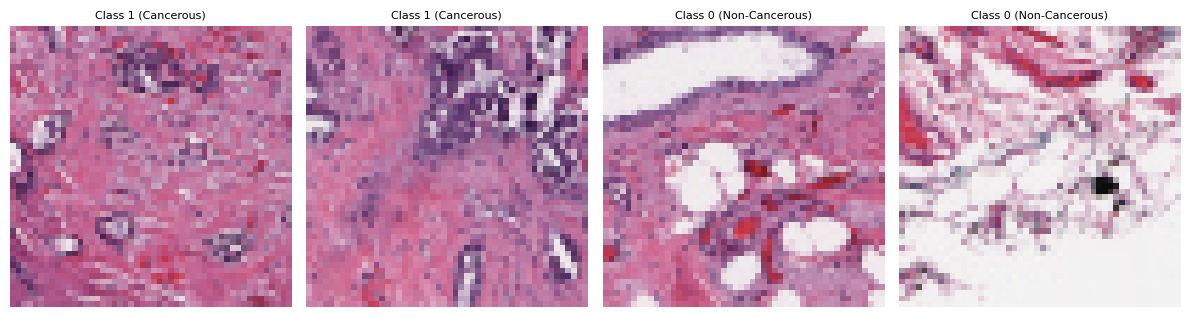

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Paths for cancerous and non-cancerous images
cancerous_dir = os.path.join(output_dir, 'cancerous')
non_cancerous_dir = os.path.join(output_dir, 'non_cancerous')

# Randomly select 2 images from each class
cancerous_images = random.sample(os.listdir(cancerous_dir), 2)
non_cancerous_images = random.sample(os.listdir(non_cancerous_dir), 2)

# Prepare the images and their corresponding labels
images = []
labels = []

# Load cancerous images (Class 1)
for img in cancerous_images:
    img_path = os.path.join(cancerous_dir, img)
    images.append(img_path)
    labels.append('Class 1 (Cancerous)')

# Load non-cancerous images (Class 0)
for img in non_cancerous_images:
    img_path = os.path.join(non_cancerous_dir, img)
    images.append(img_path)
    labels.append('Class 0 (Non-Cancerous)')

# Plot the images with labels in one row
plt.figure(figsize=(12, 4))  # Adjust figure size for smaller images
for i in range(4):
    plt.subplot(1, 4, i + 1)  # One row and 4 columns
    img = mpimg.imread(images[i])
    plt.imshow(img)
    plt.title(labels[i], fontsize=8)  # Smaller title font
    plt.axis('off')

plt.tight_layout()
plt.show()


# Data Preprocessing

In [ ]:
import os
import shutil

# Remove empty folders
folders_to_remove = [os.path.join(base_dir, 'class_1'), os.path.join(base_dir, 'class_0')]

for folder in folders_to_remove:
    if os.path.exists(folder) and len(os.listdir(folder)) == 0:  # Check if folder is empty
        os.rmdir(folder)
        print(f"Removed empty folder: {folder}")

print("Empty folders removed. Proceeding with preprocessing...")


Empty folders removed. Proceeding with preprocessing...


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Define paths
base_dir = '/content/selected_images'  # Path to the folder containing 'cancerous' and 'non_cancerous'

# Parameters
img_height, img_width = 224, 224  # Resize dimensions
batch_size = 32

# Split data into training, validation, and testing
def prepare_dataset(base_dir):
    data_gen = ImageDataGenerator(rescale=1.0/255, validation_split=0.3)  # Normalize pixel values
    train_gen = data_gen.flow_from_directory(
        base_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='binary',
        subset='training'
    )
    val_gen = data_gen.flow_from_directory(
        base_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='binary',
        subset='validation'
    )
    return train_gen, val_gen

# Prepare dataset
train_gen, val_gen = prepare_dataset(base_dir)

print("Training and validation data prepared.")


Found 70 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
Training and validation data prepared.


# CNN Model

In [ ]:
from tensorflow.keras import layers, models

# Build the CNN model with proper input shape handling
def build_cnn_model():
    model = models.Sequential([
        # First layer: Define input shape with Input() layer
        layers.Input(shape=(224, 224, 3)),

        # First Convolutional Layer
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        # Second Convolutional Layer
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        # Third Convolutional Layer
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        # Flatten the output from the convolutional layers
        layers.Flatten(),

        # Fully Connected Layer
        layers.Dense(128, activation='relu'),

        # Output Layer (Binary classification)
        layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Initialize the model
cnn_model = build_cnn_model()

# Summary of the model
cnn_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

# Plot Model Summary

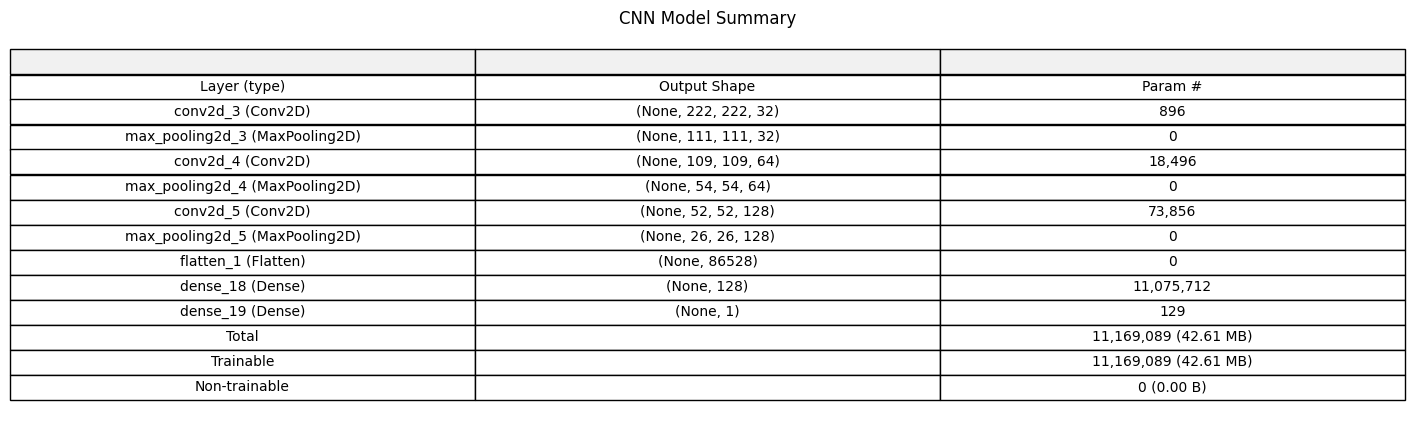

In [ ]:
import matplotlib.pyplot as plt

# Model summary data
model_summary = [
    ["Layer (type)", "Output Shape", "Param #"],
    ["conv2d_3 (Conv2D)", "(None, 222, 222, 32)", "896"],
    ["max_pooling2d_3 (MaxPooling2D)", "(None, 111, 111, 32)", "0"],
    ["conv2d_4 (Conv2D)", "(None, 109, 109, 64)", "18,496"],
    ["max_pooling2d_4 (MaxPooling2D)", "(None, 54, 54, 64)", "0"],
    ["conv2d_5 (Conv2D)", "(None, 52, 52, 128)", "73,856"],
    ["max_pooling2d_5 (MaxPooling2D)", "(None, 26, 26, 128)", "0"],
    ["flatten_1 (Flatten)", "(None, 86528)", "0"],
    ["dense_18 (Dense)", "(None, 128)", "11,075,712"],
    ["dense_19 (Dense)", "(None, 1)", "129"],
    ["Total", "", "11,169,089 (42.61 MB)"],
    ["Trainable", "", "11,169,089 (42.61 MB)"],
    ["Non-trainable", "", "0 (0.00 B)"]
]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 5))

# Plot the table
ax.axis('off')  # Hide axes

# Create a table
table = ax.table(cellText=model_summary, loc='center', colLabels=None, cellLoc='center', colColours=['#f1f1f1']*3)

# Adjust appearance
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.5, 1.5)

# Set title
plt.title("CNN Model Summary")

# Show the plot
plt.show()


# Training the Model

In [ ]:
# Train the model
history = cnn_model.fit(
    train_gen,  # Training data generator
    epochs=10,  # Adjust epochs as needed
    validation_data=val_gen  # Validation data generator
)

# Evaluate the model on the validation set
val_loss, val_acc = cnn_model.evaluate(val_gen)
print(f"Validation Accuracy: {val_acc:.2f}")


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.5482 - loss: 3.6482 - val_accuracy: 0.5000 - val_loss: 1.4935
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.5156 - loss: 1.1607 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.4961 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.7023
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5156 - loss: 0.6897 - val_accuracy: 0.5000 - val_loss: 0.6888
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5117 - loss: 0.6839 - val_accuracy: 0.5000 - val_loss: 0.7092
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.4715 - loss: 0.7142 - val_accuracy: 0.5000 - val_loss: 0.6926
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.5132 - loss: 0.6826 - val_accuracy: 0.5000 - val_loss: 0.6888
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5234 - loss: 0.6728 - val_accuracy: 0.4667 - val_loss: 0.6727
Epoch 9/10
3

# Visualizing Training Performance

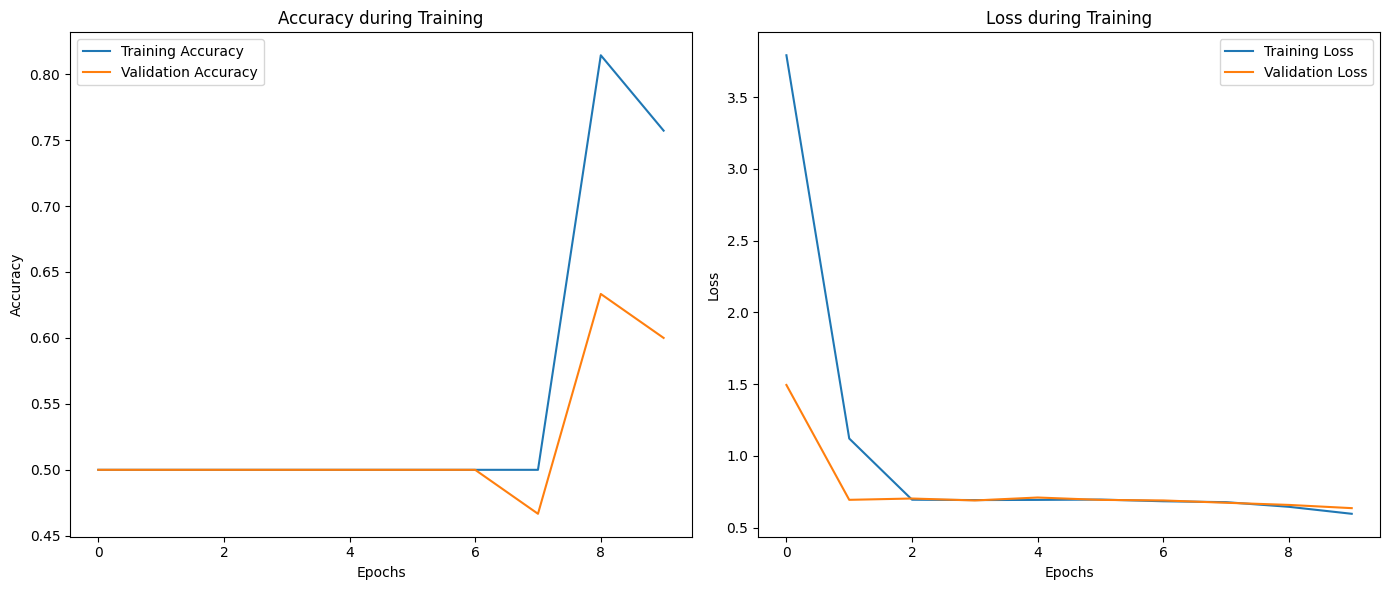

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Accuracy during Training')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plot loss
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Loss during Training')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Display the plots
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


# Using Pre-trained VGG16 for Transfer Learning:
First, we'll load the pre-trained VGG16 model, excluding the fully connected layers (i.e., the top layers), and then add our custom layers on top for cancer detection.

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

# Load the VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model so its weights aren't updated during training
base_model.trainable = False

# Create the model and add custom layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # Reduce feature map size
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # For binary classification (cancerous or not)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,780,481 (56.38 MB)

 Trainable params: 65,793 (257.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

# Using Pre-trained ResNet50 for Transfer Learning:
Similarly, we can use ResNet50 as a base model.

In [ ]:
from tensorflow.keras.applications import ResNet50

# Load the ResNet50 model without the top layers
base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model so its weights aren't updated during training
base_model_resnet.trainable = False

# Create the model and add custom layers
model_resnet = models.Sequential([
    base_model_resnet,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # For binary classification (cancerous or not)
])

# Compile the model
model_resnet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_resnet.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,850,113 (90.98 MB)

 Trainable params: 262,401 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

# Fine-tuning the Model:
Once the model has been trained using the base model (VGG16 or ResNet50), we can optionally unfreeze some layers of the pre-trained model to fine-tune it.

In [ ]:
# Unfreeze some of the top layers of the pre-trained model
base_model.trainable = True
fine_tune_at = 100  # Unfreeze from this layer onward

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Recompile the model after unfreezing some layers
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


# Training the Model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize the images
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define the validation data generator (only rescaling)
val_datagen = ImageDataGenerator(rescale=1./255)

# Create the training data generator
train_generator = train_datagen.flow_from_directory(
    '/content/selected_images',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'  # Binary classification (cancerous or non-cancerous)
)

# Create the validation data generator
validation_generator = val_datagen.flow_from_directory(
    '/content/selected_images',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
history_resnet = model_resnet.fit(
    train_generator,  # Use the training data generator
    epochs=10,
    validation_data=validation_generator  # Use the validation data generator
)


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.4361 - loss: 0.7986 - val_accuracy: 0.5000 - val_loss: 0.7125
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 193ms/step - accuracy: 0.5670 - loss: 0.8067 - val_accuracy: 0.5000 - val_loss: 0.8393
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 170ms/step - accuracy: 0.4835 - loss: 0.7984 - val_accuracy: 0.5000 - val_loss: 0.7510
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step - accuracy: 0.4846 - loss: 0.7758 - val_accuracy: 0.5000 - val_loss: 0.7563
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 279ms/step - accuracy: 0.4535 - loss: 0.7783 - val_accuracy: 0.5000 - val_loss: 0.6909
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 217ms/step - accuracy: 0.4435 - loss: 0.7046 - val_accuracy: 0.5500 - val_loss: 0.6905
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - accuracy: 0.5365 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6961
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step - accuracy: 0.4908 - loss: 0.7011 - val_accuracy: 0.4900 - val_loss: 0

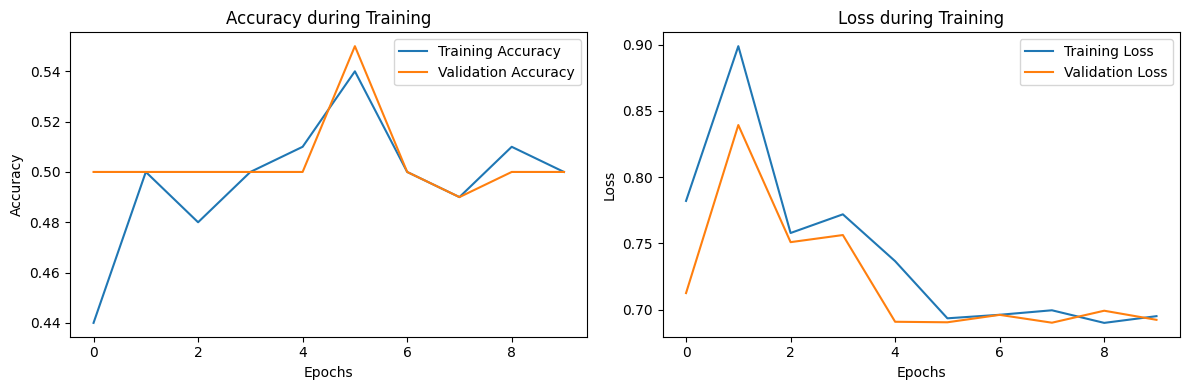

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_resnet.history['accuracy'], label='Training Accuracy')
plt.plot(history_resnet.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy during Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_resnet.history['loss'], label='Training Loss')
plt.plot(history_resnet.history['val_loss'], label='Validation Loss')
plt.title('Loss during Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Print the names of all layers to find the correct convolutional block
for layer in model_resnet.layers:
    print(layer.name)


resnet50
global_average_pooling2d_1
dense_4
dense_5


# implement the Grad CAM

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


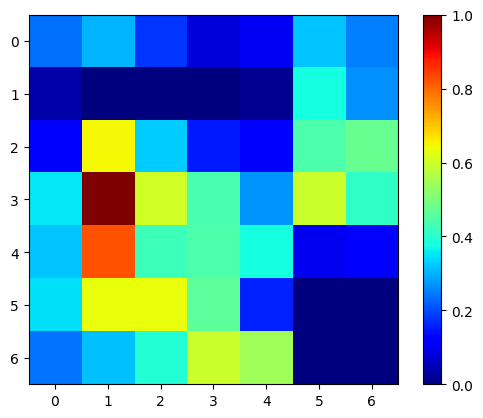

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.models import Model

# Load an image and preprocess it
img_path = "/content/selected_images/cancerous/9227_idx5_x951_y1551_class1.png"
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Use the ResNet50 model (replace with your own if needed)
model_resnet = tf.keras.applications.ResNet50(weights='imagenet')

# Function to generate Grad-CAM heatmap
def generate_grad_cam(input_image, model, layer_name):
    grad_model = Model(
        inputs=model.input,
        outputs=[model.get_layer(layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(input_image)
        loss = predictions[:, np.argmax(predictions[0])]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply the pooled gradients by the feature map to get the weighted feature maps
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_mean(tf.multiply(conv_outputs, pooled_grads), axis=-1)

    # Normalize the heatmap
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    return heatmap

# Choose a convolution layer for Grad-CAM (you can experiment with different layers)
layer_name = "conv5_block3_out"  # Or another layer like "conv4_block3_out" based on your architecture

# Generate Grad-CAM heatmap
heatmap = generate_grad_cam(img_array, model_resnet, layer_name)

# Display the heatmap
plt.imshow(heatmap, cmap='jet')
plt.colorbar()
plt.show()


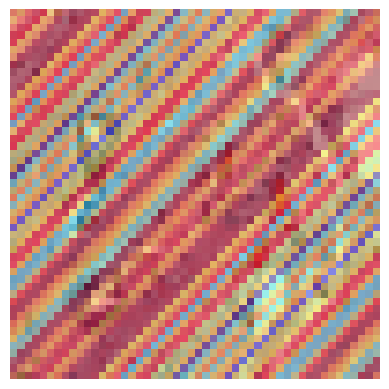

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Superimpose heatmap on the original image
def superimpose_heatmap(img_path, heatmap):
    # Load original image
    img = image.load_img(img_path)
    img_array = image.img_to_array(img)

    # Resize heatmap to match the size of the image
    heatmap = np.uint8(255 * heatmap)  # Scale heatmap to range [0, 255]
    heatmap = np.resize(heatmap, (img_array.shape[0], img_array.shape[1]))

    # Ensure the image array is in uint8 type for blending
    img_array = np.uint8(img_array)

    # Apply heatmap to original image (with some transparency)
    heatmap_img = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(img_array, 0.6, heatmap_img, 0.4, 0)

    # Display the result
    plt.imshow(superimposed_img)
    plt.axis('off')
    plt.show()

# Superimpose heatmap on the original image
superimpose_heatmap(img_path, heatmap)


# Code for Grad-CAM Visualization

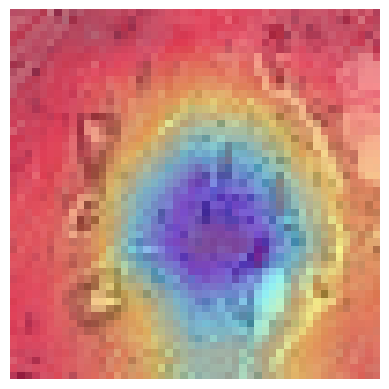

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing import image
from tensorflow.keras.applications import resnet50
from tensorflow.keras.models import Model
import tensorflow as tf

# Load pre-trained ResNet50 model
model_resnet = resnet50.ResNet50(weights='imagenet')

# Function to generate Grad-CAM heatmap
def generate_grad_cam(img_array, model, layer_name="conv5_block3_out"):
    """
    Generate Grad-CAM heatmap for a given image and model.
    :param img_array: Preprocessed image array.
    :param model: Keras model used for prediction.
    :param layer_name: Name of the convolutional layer to extract gradients from.
    :return: Grad-CAM heatmap.
    """
    # Get the target layer for Grad-CAM (conv5_block3_out for ResNet50)
    target_layer = model.get_layer(layer_name)

    # Create a new model to output the gradient of the last convolutional layer w.r.t. the output
    grad_model = Model(inputs=model.input, outputs=[target_layer.output, model.output])

    # Compute the gradient of the predicted class w.r.t. the output feature map
    with tf.GradientTape() as tape:
        # Record the operations for automatic differentiation
        conv_output, predictions = grad_model(img_array)
        class_idx = np.argmax(predictions[0])  # Get the index of the predicted class
        class_output = predictions[:, class_idx]  # Get the class output

    # Get the gradient of the class output w.r.t. the feature map
    grads = tape.gradient(class_output, conv_output)

    # Average the gradients across all the filters to get the importance of each feature
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2)).numpy()

    # Multiply the feature map by the importance of each feature
    conv_output = conv_output[0].numpy()
    for i in range(conv_output.shape[-1]):
        conv_output[:, :, i] *= pooled_grads[i]

    # Average the feature map across all channels
    heatmap = np.mean(conv_output, axis=-1)

    # Normalize the heatmap to range [0, 1]
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    return heatmap

# Function to superimpose the Grad-CAM heatmap on the original image
def superimpose_heatmap(img_path, heatmap):
    """
    Superimpose the Grad-CAM heatmap on the original image.
    :param img_path: Path to the input image.
    :param heatmap: Grad-CAM heatmap.
    """
    # Load original image
    img = image.load_img(img_path)
    img_array = image.img_to_array(img)

    # Resize heatmap to match the size of the image
    heatmap = np.uint8(255 * heatmap)  # Scale heatmap to range [0, 255]
    heatmap = cv2.resize(heatmap, (img_array.shape[1], img_array.shape[0]))

    # Apply heatmap to original image (with some transparency)
    heatmap_img = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(img_array.astype(np.uint8), 0.6, heatmap_img, 0.4, 0)

    # Display the result
    plt.imshow(superimposed_img)
    plt.axis('off')
    plt.show()

# Load and preprocess the image
img_path = '/content/selected_images/cancerous/9227_idx5_x951_y1551_class1.png'  # Use an available image

img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize the image

# Generate Grad-CAM heatmap
layer_name = "conv5_block3_out"  # ResNet50 layer name for Grad-CAM
heatmap = generate_grad_cam(img_array, model_resnet, layer_name)

# Superimpose heatmap on the original image
superimpose_heatmap(img_path, heatmap)


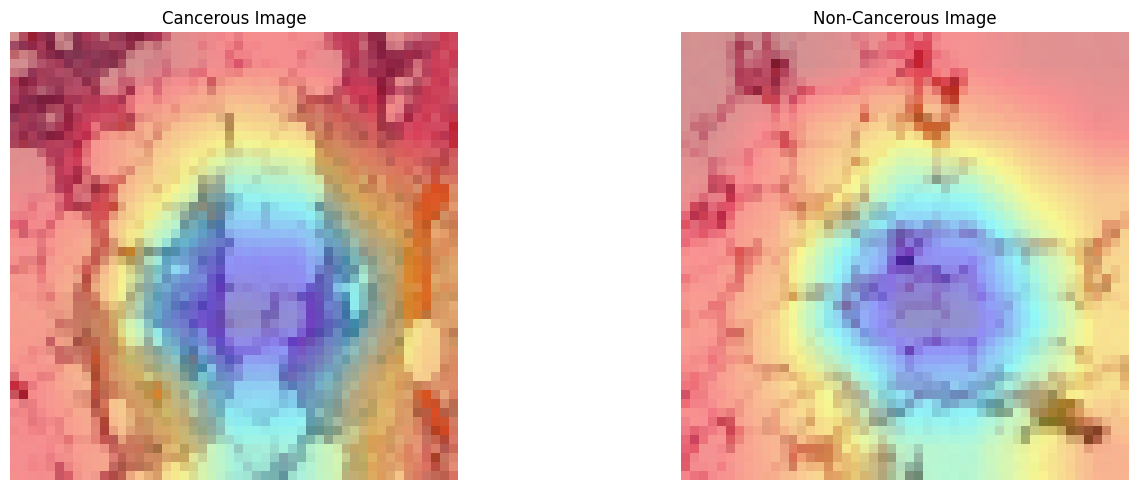

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
import cv2
from tensorflow.keras.applications import resnet50

# Load pre-trained ResNet50 model
model_resnet = resnet50.ResNet50(weights='imagenet')

# Function to generate Grad-CAM heatmap
def generate_grad_cam(img_array, model, layer_name="conv5_block3_out"):
    target_layer = model.get_layer(layer_name)
    grad_model = Model(inputs=model.input, outputs=[target_layer.output, model.output])

    with tf.GradientTape() as tape:
        conv_output, predictions = grad_model(img_array)
        class_idx = np.argmax(predictions[0])  # Get the index of the predicted class
        class_output = predictions[:, class_idx]  # Get the class output

    grads = tape.gradient(class_output, conv_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2)).numpy()

    conv_output = conv_output[0].numpy()
    for i in range(conv_output.shape[-1]):
        conv_output[:, :, i] *= pooled_grads[i]

    heatmap = np.mean(conv_output, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    return heatmap

# Function to superimpose the Grad-CAM heatmap on the original image
def superimpose_heatmap(img_path, heatmap):
    img = image.load_img(img_path)
    img_array = image.img_to_array(img)

    heatmap = np.uint8(255 * heatmap)  # Scale heatmap to range [0, 255]
    heatmap = cv2.resize(heatmap, (img_array.shape[1], img_array.shape[0]))  # Resize heatmap

    heatmap_img = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(img_array.astype(np.uint8), 0.6, heatmap_img, 0.4, 0)

    return superimposed_img

# Function to load random image from the cancerous or non-cancerous directory
def load_random_image(image_dir):
    img_path = random.choice(os.listdir(image_dir))
    img_path = os.path.join(image_dir, img_path)
    return img_path

# Directories where the cancerous and non-cancerous images are stored
cancerous_dir = '/content/selected_images/cancerous'
non_cancerous_dir = '/content/selected_images/non_cancerous'

# Load a random cancerous and non-cancerous image
cancerous_img_path = load_random_image(cancerous_dir)
non_cancerous_img_path = load_random_image(non_cancerous_dir)

# Load and preprocess the images
cancerous_img = image.load_img(cancerous_img_path, target_size=(224, 224))
cancerous_img_array = image.img_to_array(cancerous_img)
cancerous_img_array = np.expand_dims(cancerous_img_array, axis=0) / 255.0

non_cancerous_img = image.load_img(non_cancerous_img_path, target_size=(224, 224))
non_cancerous_img_array = image.img_to_array(non_cancerous_img)
non_cancerous_img_array = np.expand_dims(non_cancerous_img_array, axis=0) / 255.0

# Generate Grad-CAM heatmaps
heatmap_cancerous = generate_grad_cam(cancerous_img_array, model_resnet)
heatmap_non_cancerous = generate_grad_cam(non_cancerous_img_array, model_resnet)

# Superimpose heatmap on the images
superimposed_cancerous = superimpose_heatmap(cancerous_img_path, heatmap_cancerous)
superimposed_non_cancerous = superimpose_heatmap(non_cancerous_img_path, heatmap_non_cancerous)

# Plot the images and heatmaps in one row
plt.figure(figsize=(15, 5))

# Plot cancerous image and heatmap
plt.subplot(1, 2, 1)
plt.imshow(superimposed_cancerous)
plt.axis('off')
plt.title('Cancerous Image')

# Plot non-cancerous image and heatmap
plt.subplot(1, 2, 2)
plt.imshow(superimposed_non_cancerous)
plt.axis('off')
plt.title('Non-Cancerous Image')

plt.tight_layout()
plt.show()
